In [10]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Mai 19

@author: ChatGPT
"""

import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [11]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [12]:


# Normalize the images to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Add a channel dimension (grayscale = 1 channel)
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

In [48]:
x_train.shape

(60000, 28, 28, 1)

In [52]:
x_train_nine = x_train[y_train == 9]

In [53]:
x_train_other = x_train[y_train != 9]

In [55]:
x_train_other.shape

(54051, 28, 28, 1)

In [16]:
x_train_nine = x_train_nine[:200]

In [22]:
input = layers.Input(shape=(28,28,1))

x = layers.Conv2D(32, 3, activation='relu', padding='same')(input)
x = layers.MaxPooling2D()(x)
x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D()(x)

x = layers.Conv2DTranspose(64, 3, activation='relu', padding='same')(encoded)
x = layers.UpSampling2D()(x)
x = layers.Conv2DTranspose(32, 3, activation='relu', padding='same')(x)
x = layers.UpSampling2D()(x)
decoded = layers.Conv2D(1, 3, activation='sigmoid', padding='same')(x)

autoencoder = models.Model(input, decoded)
autoencoder.compile(optimizer='adam', loss='mse')


Epoch 1/25


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.2327 - val_loss: 0.2190
Epoch 2/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step - loss: 0.2187 - val_loss: 0.2082
Epoch 3/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step - loss: 0.2074 - val_loss: 0.1960
Epoch 4/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step - loss: 0.1945 - val_loss: 0.1829
Epoch 5/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step - loss: 0.1805 - val_loss: 0.1708
Epoch 6/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step - loss: 0.1675 - val_loss: 0.1602
Epoch 7/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step - loss: 0.1562 - val_loss: 0.1500
Epoch 8/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step - loss: 0.1457 - val_loss: 0.1396
Epoch 9/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step - loss: 0.1353 - val_loss: 0.1297
Epoch 10/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step - loss: 0.1254 - val_loss: 0.1214
Epoch 11/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step - loss: 0.1173 - val_loss: 0.1155
Epoch 12/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step - loss: 0.1113 - val_loss: 0.1117
Epo

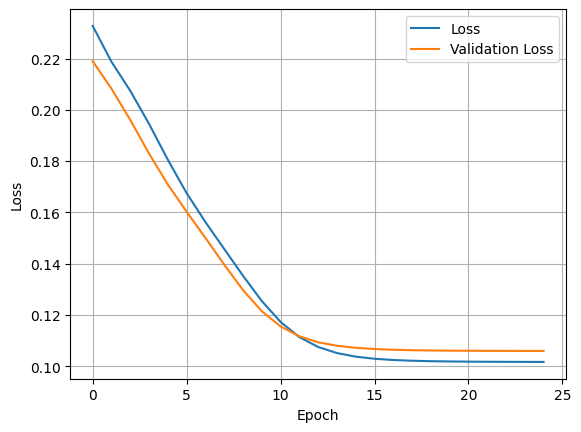

In [ ]:
history = autoencoder.fit(
    x_train_nine, x_train_nine,  # input = output
    epochs=25,
    batch_size=200,
    shuffle=True,
    validation_split=0.1
)

losses = history.history['loss']
val_losses = history.history['val_loss']


# Plot training history
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [26]:
len(losses[0])

25

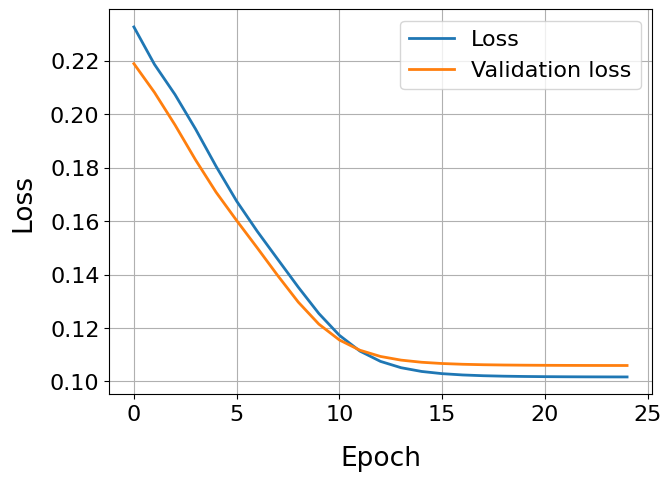

In [37]:

plt.figure(figsize=(7, 5))
font_size = 16

plt.plot(losses[0], label='Loss', linewidth=2)
plt.plot(val_losses[0], label='Validation loss', linewidth=2)
# plt.plot(times, sum_six.cpu()[500:])
plt.legend(fontsize=font_size)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.grid(True)
plt.xlabel('Epoch', fontsize=font_size+3, labelpad=15)
plt.ylabel('Loss', fontsize=font_size+3, labelpad=10)
plt.savefig('plots/CNN_learn.png', dpi=300, bbox_inches='tight')

Epoch 1/20


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - loss: 0.1016 - val_loss: 0.1059
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step - loss: 0.1016 - val_loss: 0.1059
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step - loss: 0.1016 - val_loss: 0.1059
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step - loss: 0.1016 - val_loss: 0.1059
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step - loss: 0.1016 - val_loss: 0.1059
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step - loss: 0.1016 - val_loss: 0.1059
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step - loss: 0.1016 - val_loss: 0.1059
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step - loss: 0.1016 - val_loss: 0.1059
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step - loss: 0.1016 - val_loss: 0.1059
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step - loss: 0.1016 - val_loss: 0.1059
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step - loss: 0.1016 - val_loss: 0.1059
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step - loss: 0.1016 - val_loss: 0.1059


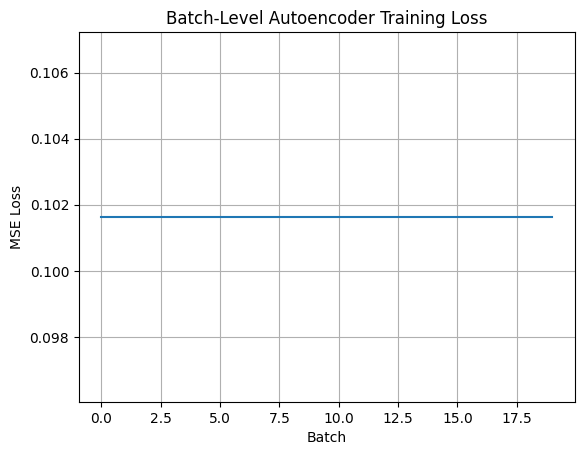

In [25]:
from tensorflow.keras.callbacks import LambdaCallback

batch_losses = []

batch_logger = LambdaCallback(
    on_batch_end=lambda batch, logs: batch_losses.append(logs['loss'])
)

history = autoencoder.fit(
    x_train_nine, x_train_nine,
    epochs=20,
    batch_size=200,
    validation_split=0.1,
    callbacks=[batch_logger]
)

# Plot batch-level loss
plt.plot(batch_losses)
plt.xlabel('Batch')
plt.ylabel('MSE Loss')
plt.title('Batch-Level Autoencoder Training Loss')
plt.grid(True)
plt.show()


In [56]:
test_9 = x_train_nine[-100:]
test_not_9 = x_train_other[-100:]

In [57]:
import numpy as np
# Predict reconstructed images

x_pred_9 = autoencoder.predict(test_9)

# Compute reconstruction error per image
recon_error_9 = np.mean((test_9 - x_pred_9) ** 2, axis=(1,2,3))



x_pred_not_9 = autoencoder.predict(test_not_9)

# Compute reconstruction error per image
recon_error_not_9 = np.mean((test_not_9 - x_pred_not_9) ** 2, axis=(1,2,3))



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [ ]:
x_pred = autoencoder.predict(x_train[-200:])

# Compute reconstruction error per image
recon_error_9 = np.mean((x_train[-200:] - x_pred) ** 2, axis=(1,2,3))

In [59]:
from scipy.stats import mannwhitneyu

u_sum, p_sum = mannwhitneyu(recon_error_9, recon_error_not_9, alternative='two-sided')

In [60]:
u_sum

np.float64(5302.0)

In [61]:
p_sum

np.float64(0.4613159079670164)

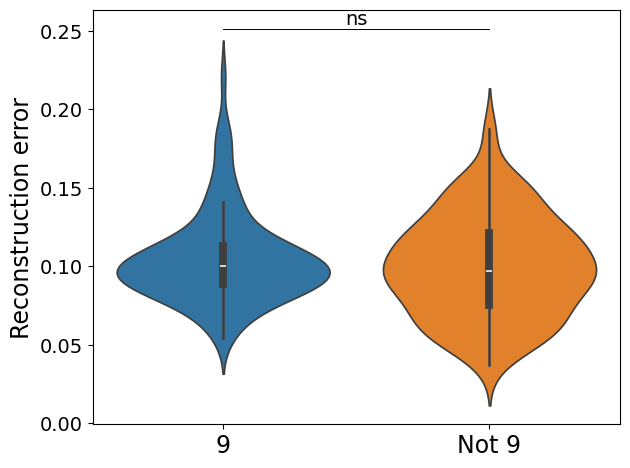

In [79]:
import seaborn as sns
label_size = 14

data = [recon_error_9, recon_error_not_9]
sns.violinplot(data)

plt.tick_params(labelsize=label_size)
plt.xticks([0,1],['9', 'Not 9'], fontsize=label_size+3)
plt.ylabel('Reconstruction error', fontsize=label_size+3)


y_max = max(max(recon_error_9), max(recon_error_not_9)) + 0.03
plt.plot([0, 1], [y_max, y_max], color='black', linewidth=0.7)

# Add significance asterisk
plt.text(0.5, y_max + 0.003, "ns", ha='center', fontsize=label_size)

plt.tight_layout()
plt.savefig("plots/CNN_validate.png", dpi= 300)

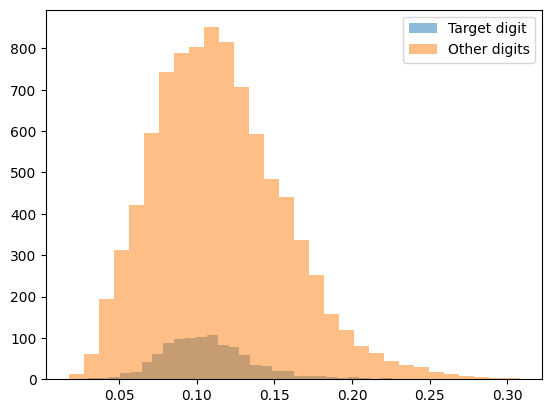

In [39]:
plt.hist(recon_error[y_test == 9], bins=30, alpha=0.5, label='Target digit')
plt.hist(recon_error[y_test != 9], bins=30, alpha=0.5, label='Other digits')
plt.legend()
plt.show()

In [16]:
np.mean(recon_error[y_test == 9])

np.float32(0.10694255)

In [22]:
recon_error[y_test != 9].shape

(8991,)

In [17]:
np.mean(recon_error[y_test != 9])

np.float32(0.114746705)

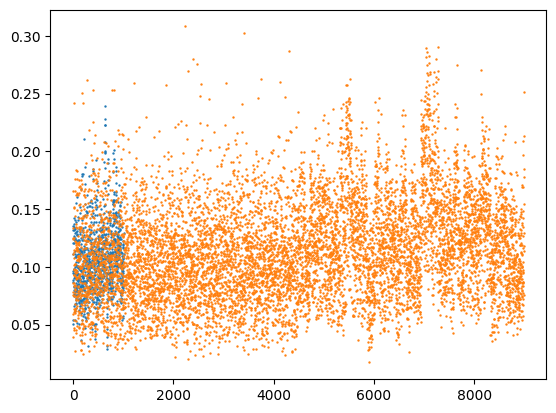

In [32]:
plt.scatter(np.arange(0,1009), recon_error[y_test == 9], s=0.5)
plt.scatter(np.arange(0,8991), recon_error[y_test != 9], s = 0.5)

Train normal CNN and 

Epoch 1/5


/home/yaning/.conda/envs/spike/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
E0000 00:00:1747668203.252408 2352596 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
E0000 00:00:1747668203.255704 2352596 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1747668203.259329 2352596 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed proper

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8997 - loss: 0.3263 - val_accuracy: 0.9833 - val_loss: 0.0539
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9849 - loss: 0.0480 - val_accuracy: 0.9875 - val_loss: 0.0387
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9909 - loss: 0.0297 - val_accuracy: 0.9903 - val_loss: 0.0285
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9929 - loss: 0.0220 - val_accuracy: 0.9908 - val_loss: 0.0281
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9950 - loss: 0.0146 - val_accuracy: 0.9917 - val_loss: 0.0259
313/313 - 1s - 2ms/step - accuracy: 0.9917 - loss: 0.0259

Test accuracy: 0.9917


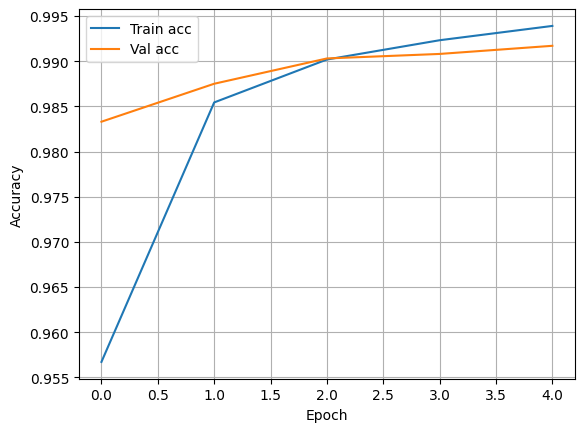

In [23]:


# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 output classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")

# Plot training history
plt.plot(history.history['accuracy'], label='Train acc')
plt.plot(history.history['val_accuracy'], label='Val acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


Get the convolution layer of one image

In [5]:
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [6]:
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # Layer 0
    layers.MaxPooling2D((2, 2)),                                            # Layer 1
    layers.Conv2D(64, (3, 3), activation='relu'),                           # Layer 2
    layers.MaxPooling2D((2, 2))                                             # Layer 3
])

/home/yaning/.conda/envs/spike/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
E0000 00:00:1748440465.806883 2406298 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
E0000 00:00:1748440465.809815 2406298 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1748440465.813036 2406298 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed proper

In [17]:
# Choose the layer outputs you want to observe
layer_outputs = [layer.output for layer in model.layers[:]]  # You can choose specific layers

# Create a model that maps input to these intermediate outputs
activation_model = Model(inputs=model.inputs, outputs=layer_outputs)

In [18]:


# Example image: shape (28, 28), already normalized (0–1)
sample_image = x_test[0]  # Pick a test image
sample_image = np.expand_dims(sample_image, axis=0)  # Add batch dimension
# Shape becomes (1, 28, 28)
sample_image = np.expand_dims(sample_image, axis=-1) # Add channel dimension
# Shape becomes (1, 28, 28, 1)

# Get activations
activations = activation_model.predict(sample_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


/home/yaning/.conda/envs/spike/lib/python3.10/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 28, 28, 1, 1))
  warnings.warn(msg)


In [19]:
len(activations)

4

In [21]:
feature_maps.shape

(1, 5, 5, 64)

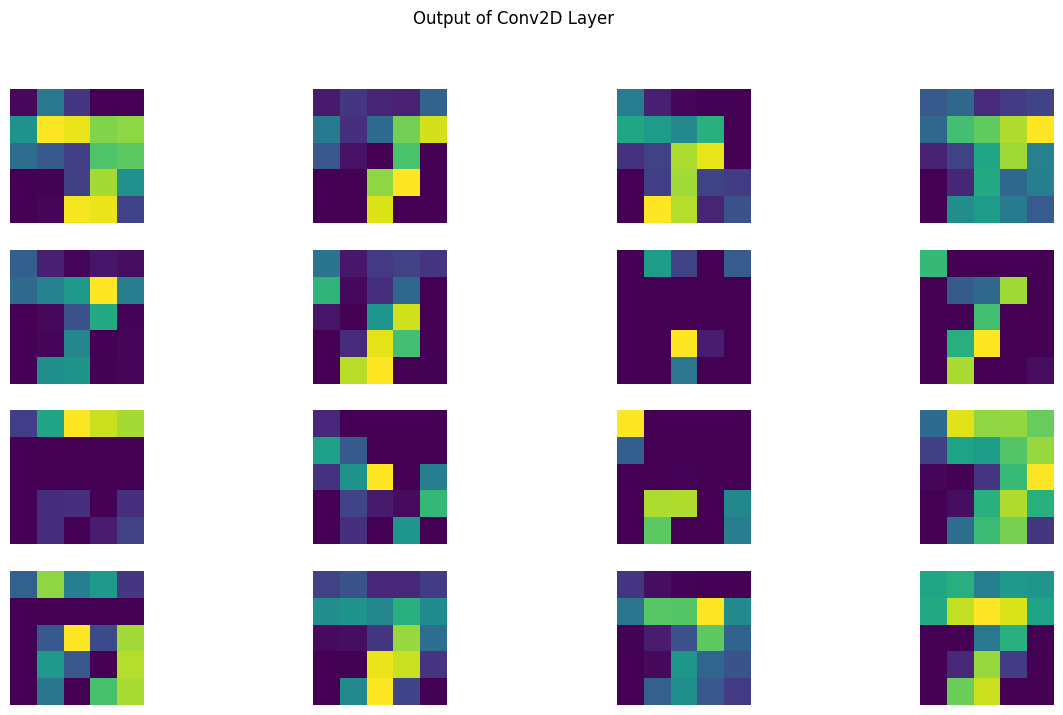

In [20]:


# Show the output of the first Conv2D layer (activations[0])
feature_maps = activations[-1]  # Shape: (1, H, W, 32)
num_filters = feature_maps.shape[-1]

plt.figure(figsize=(15, 8))
for i in range(min(num_filters, 16)):  # Show first 16 filters
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(feature_maps[0, :, :, i], cmap='viridis')
    plt.axis('off')
plt.suptitle("Output of Conv2D Layer")
plt.show()
